# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nisa Agni Afifah
- Email: agniafifah21@gmail.com
- Id Dicoding: ichaa_agni

## Persiapan

### Menyiapkan library yang dibutuhkan

In [9]:
import pandas as pd              # Mengimpor pustaka pandas dan memberi alias 'pd' untuk manipulasi data
import numpy as np               # Mengimpor pustaka numpy sebagai 'np' untuk operasi numerik
import seaborn as sns            # Mengimpor pustaka seaborn sebagai 'sns' untuk membuat grafik statistik yang lebih menarik
import matplotlib.pyplot as plt  # Mengimpor modul pyplot dari matplotlib untuk visualisasi data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,               # Akurasi
    confusion_matrix,             # Matriks kebingungan
    precision_score,              # Presisi
    recall_score,                 # Recall
    roc_curve,                    # Kurva ROC
    roc_auc_score,                # Nilai AUC
    classification_report,        # Laporan klasifikasi lengkap
    f1_score                      # F1 Score
)
from sklearn.model_selection import cross_val_score          # Validasi silang
from sklearn.model_selection import GridSearchCV             # Pencarian grid untuk optimasi parameter

# Mengimpor pustaka joblib untuk menyimpan dan memuat model
import joblib


### Menyiapkan data yang akan diguankan

In [11]:
# Membaca file CSV 'employee_data.csv' dari direktori '/content'
# Menggunakan encoding 'windows-1252' untuk memastikan karakter khusus dapat dibaca dengan benar
data_karyawan = pd.read_csv("employee_data.csv", encoding='windows-1252')


## Data Understanding

In [12]:
# Menampilkan 5 baris pertama dari DataFrame data_karyawan
data_karyawan.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [13]:
# Menampilkan dimensi DataFrame data_karyawan (jumlah baris dan kolom)
data_karyawan.shape

(1470, 35)

In [14]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame data_karyawan
data_karyawan.dtypes

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [15]:
# Menampilkan statistik deskriptif untuk kolom bertipe objek (biasanya teks) dalam DataFrame data_karyawan
data_karyawan.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [16]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame data_karyawan
data_karyawan.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# Menghitung jumlah baris duplikat dalam DataFrame data_karyawan
data_karyawan.duplicated().sum()

0

In [18]:
# Mengecek jumlah nilai kosong (NaN) di setiap kolom pada DataFrame data_karyawan
data_karyawan.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Data Preparation / Preprocessing

### Handling Missing Value

In [19]:
# Menghitung nilai yang paling sering muncul (modus) pada kolom 'Attrition' di data_karyawan
mode_value = data_karyawan['Attrition'].mode()[0]
# Mengisi nilai kosong (NaN) di kolom 'Attrition' dengan nilai modus
data_karyawan['Attrition'] = data_karyawan['Attrition'].fillna(mode_value)

In [20]:
# Mengecek jumlah nilai kosong (NaN) di setiap kolom dalam DataFrame data_karyawan
data_karyawan.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Feature Engineering

In [21]:
# Menghitung rata-rata dari tiga kolom kepuasan dan menyimpannya dalam kolom baru 'PerformanceSatisfactionIndex'
data_karyawan['PerformanceSatisfactionIndex'] = data_karyawan[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

# Menghapus kolom-kolom kepuasan individual karena sudah dirangkum ke dalam satu kolom baru
data_karyawan.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'], axis=1, inplace=True)

In [22]:
# Fungsi untuk mengelompokkan skor kepuasan menjadi kategori: Low, Medium, High, Very High
def satisfaction(score):
    score = float(score)
    if (score >= 1.00) and (score <= 1.99):
        return 'Low'
    elif (score >= 2.0) and (score <= 2.99):
        return 'Medium'
    elif (score >= 3.00) and (score <= 3.99):
        return 'High'
    else:
        return 'Very High'

# Menerapkan fungsi satisfaction ke kolom 'PerformanceSatisfactionIndex' di DataFrame data_karyawan
data_karyawan['PerformanceSatisfactionIndex'] = data_karyawan['PerformanceSatisfactionIndex'].apply(satisfaction)

In [23]:
# Menghitung pengalaman kerja sebelum pekerjaan saat ini dengan mengurangi
# tahun total bekerja dengan tahun yang telah dihabiskan di perusahaan saat ini.
data_karyawan['ExperiencePriorToCurrentJob'] = data_karyawan['TotalWorkingYears'] - data_karyawan['YearsAtCompany']

# Menghapus kolom 'TotalWorkingYears' dan 'YearsAtCompany' karena tidak diperlukan lagi
# setelah kita memiliki informasi tentang pengalaman sebelum pekerjaan saat ini.
data_karyawan.drop(['TotalWorkingYears', 'YearsAtCompany'], axis=1, inplace=True)


In [24]:
# Mengklasifikasikan pengalaman kerja berdasarkan jumlah tahun pengalaman
def experience(years):
    if (years >= 0) and (years <= 5):  # Pengalaman 0-5 tahun: Junior
        return 'Junior'
    elif (years >= 6) and (years <= 10):  # Pengalaman 6-10 tahun: Mid-level
        return 'Mid-level'
    elif (years >= 11) and (years <= 20):  # Pengalaman 11-20 tahun: Senior
        return 'Senior'
    elif (years >= 21) and (years <= 30):  # Pengalaman 21-30 tahun: Expert
        return 'Expert'
    else:  # Pengalaman lebih dari 30 tahun: Veteran
        return 'Veteran'

# Menggunakan fungsi 'experience' untuk mengklasifikasikan setiap nilai dalam kolom 'ExperiencePriorToCurrentJob'
data_karyawan['ExperiencePriorToCurrentJob'] = data_karyawan['ExperiencePriorToCurrentJob'].apply(experience)


In [25]:
# Menghitung skor keterlibatan karyawan dengan rata-rata dari kolom 'JobInvolvement',
# 'PerformanceRating', dan 'WorkLifeBalance' untuk menghasilkan skor keterlibatan karyawan
data_karyawan['EmployeeEngagementScore'] = (data_karyawan['JobInvolvement'] +
                                            data_karyawan['PerformanceRating'] +
                                            data_karyawan['WorkLifeBalance']) / 3

# Menghapus kolom 'JobInvolvement', 'PerformanceRating', dan 'WorkLifeBalance'
# setelah skor keterlibatan karyawan dihitung dan disimpan di kolom baru 'EmployeeEngagementScore'
data_karyawan.drop(['JobInvolvement', 'PerformanceRating', 'WorkLifeBalance'], axis=1, inplace=True)

In [26]:
# Mengklasifikasikan skor keterlibatan karyawan berdasarkan rentang nilai
def engagement(score):
    score = float(score)  # Mengonversi nilai skor menjadi float agar dapat dibandingkan
    if (score >= 1.00) and (score <= 1.99):  # Skor antara 1.00 dan 1.99 dianggap 'Bad'
        return 'Bad'
    elif (score >= 2.0) and (score <= 2.99):  # Skor antara 2.00 dan 2.99 dianggap 'Good'
        return 'Good'
    elif (score >= 3.00) and (score <= 3.99):  # Skor antara 3.00 dan 3.99 dianggap 'Better'
        return 'Better'
    else:  # Skor 4.00 atau lebih dianggap 'Best'
        return 'Best'

# Menggunakan fungsi 'engagement' untuk mengklasifikasikan setiap nilai dalam kolom 'EmployeeEngagementScore'
data_karyawan['EmployeeEngagementScore'] = data_karyawan['EmployeeEngagementScore'].apply(engagement)


In [27]:
# Fungsi untuk mengklasifikasikan jarak karyawan dari rumah berdasarkan rentang nilai
def distance_category(distance):
    if (distance >= 1) & (distance <= 10):  # Jarak antara 1 hingga 10 dianggap sebagai 'Short Distance'
        return 'Short Distance'
    elif (distance >= 11) & (distance <= 20):  # Jarak antara 11 hingga 20 dianggap sebagai 'Medium Distance'
        return 'Medium Distance'
    else:  # Jarak lebih dari 20 dianggap sebagai 'Long Distance'
        return 'Long Distance'

# Menggunakan fungsi 'distance_category' untuk mengklasifikasikan nilai dalam kolom 'DistanceFromHome' ke dalam kategori
data_karyawan['DistanceFromHomeCategory'] = data_karyawan['DistanceFromHome'].apply(distance_category)

# Menghapus kolom 'DistanceFromHome' karena informasi tersebut telah tergabung dalam kategori baru
data_karyawan.drop(['DistanceFromHome'], axis=1, inplace=True)

In [28]:
# Mengklasifikasikan generasi berdasarkan usia
def generation(age):
    if (age >= 61) & (age <= 70):  # Usia antara 61 hingga 70 dianggap sebagai 'Baby Boomers'
        return 'Baby Boomers'
    elif (age >= 51) & (age <= 60):  # Usia antara 51 hingga 60 dianggap sebagai 'Gen X'
        return 'Gen X'
    elif (age >= 41) & (age <= 50):  # Usia antara 41 hingga 50 dianggap sebagai 'Gen Y'
        return 'Gen Y'
    elif (age >= 31) & (age <= 40):  # Usia antara 31 hingga 40 dianggap sebagai 'Millennials'
        return 'Millennials'
    else:  # Usia 30 atau kurang dianggap sebagai 'Gen Z'
        return 'Gen Z'

# Menggunakan fungsi 'generation' untuk mengklasifikasikan usia setiap karyawan ke dalam generasi yang sesuai
data_karyawan['AgeGeneration'] = data_karyawan['Age'].apply(generation)

# Menghapus kolom 'Age' setelah generasi diklasifikasikan ke dalam kolom baru 'AgeGeneration'
data_karyawan.drop(['Age'], axis=1, inplace=True)


In [29]:
# Membuat mapping untuk kolom 'Education' berdasarkan kode numerik
education_map = {
    1: 'Below College',  # Kode 1 berarti 'Below College'
    2: 'College',        # Kode 2 berarti 'College'
    3: 'Bachelor',       # Kode 3 berarti 'Bachelor'
    4: 'Master',         # Kode 4 berarti 'Master'
    5: 'Doctor'          # Kode 5 berarti 'Doctor'
}

# Menggunakan fungsi map() untuk mengganti nilai numerik di kolom 'Education' dengan kategori yang sesuai
data_karyawan['Education'] = data_karyawan['Education'].map(education_map)

# Membuat mapping untuk kolom 'JobLevel' berdasarkan kode numerik
job_level_mapping = {
    1: 'Staff',            # Kode 1 berarti 'Staff'
    2: 'Junior Supervisor',# Kode 2 berarti 'Junior Supervisor'
    3: 'Senior Supervisor',# Kode 3 berarti 'Senior Supervisor'
    4: 'Junior Manager',   # Kode 4 berarti 'Junior Manager'
    5: 'Senior Manager'    # Kode 5 berarti 'Senior Manager'
}

# Menggunakan fungsi map() untuk mengganti nilai numerik di kolom 'JobLevel' dengan kategori yang sesuai
data_karyawan['JobLevel'] = data_karyawan['JobLevel'].map(job_level_mapping)


In [30]:
# Menghapus kolom 'StandardHours', 'EmployeeCount', dan 'Over18' karena dianggap tidak diperlukan untuk analisis
data_karyawan.drop(['StandardHours', 'EmployeeCount', 'Over18'], axis=1, inplace=True)

# Mengurutkan kolom dalam DataFrame berdasarkan nama kolom secara alfabetis untuk memudahkan pembacaan
data_karyawan = data_karyawan.reindex(sorted(data_karyawan.columns), axis=1)

# Menampilkan tipe data dari setiap kolom dalam DataFrame
data_karyawan.dtypes

AgeGeneration                    object
Attrition                       float64
BusinessTravel                   object
DailyRate                         int64
Department                       object
DistanceFromHomeCategory         object
Education                        object
EducationField                   object
EmployeeEngagementScore          object
EmployeeId                        int64
ExperiencePriorToCurrentJob      object
Gender                           object
HourlyRate                        int64
JobLevel                         object
JobRole                          object
MaritalStatus                    object
MonthlyIncome                     int64
MonthlyRate                       int64
NumCompaniesWorked                int64
OverTime                         object
PercentSalaryHike                 int64
PerformanceSatisfactionIndex     object
StockOptionLevel                  int64
TrainingTimesLastYear             int64
YearsInCurrentRole                int64


In [31]:
# Menampilkan 5 baris pertama dari DataFrame 'data_karyawan'
data_karyawan.head()

,AgeGeneration,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,EmployeeId,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceSatisfactionIndex,StockOptionLevel,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Millennials,0.0,Travel_Frequently,1444,Human Resources,Short Distance,Master,Other,Better,1,...,5224,0,Yes,11,Medium,1,2,2,1,2
1,Millennials,1.0,Travel_Rarely,1141,Research & Development,Medium Distance,College,Medical,Bad,2,...,14382,5,No,15,Low,0,2,0,0,0
2,Gen X,1.0,Travel_Rarely,1323,Research & Development,Short Distance,Master,Life Sciences,Better,3,...,10332,9,Yes,12,Medium,3,2,0,2,7
3,Gen Y,0.0,Travel_Frequently,555,Sales,Long Distance,Bachelor,Marketing,Better,4,...,14864,5,No,14,High,1,2,4,4,8
4,Millennials,0.0,Travel_Rarely,1194,Research & Development,Short Distance,Master,Medical,Better,5,...,12549,2,No,14,Medium,3,2,3,0,2


In [32]:
# Mengubah nilai 'Attrition' dari kategori (No, Yes) menjadi nilai numerik (0, 1) dengan menggunakan fungsi factorize
data_karyawan['Attrition'] = data_karyawan['Attrition'].factorize(['No', 'Yes'])[0]

# Menampilkan jumlah masing-masing kategori 'Attrition' (jumlah karyawan yang keluar vs tidak keluar)
data_karyawan['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

In [33]:
# Menyimpan DataFrame 'data_karyawan' ke dalam file CSV dengan nama 'employee_clean.csv'
data_karyawan.to_csv('employee_clean.csv', index=False)

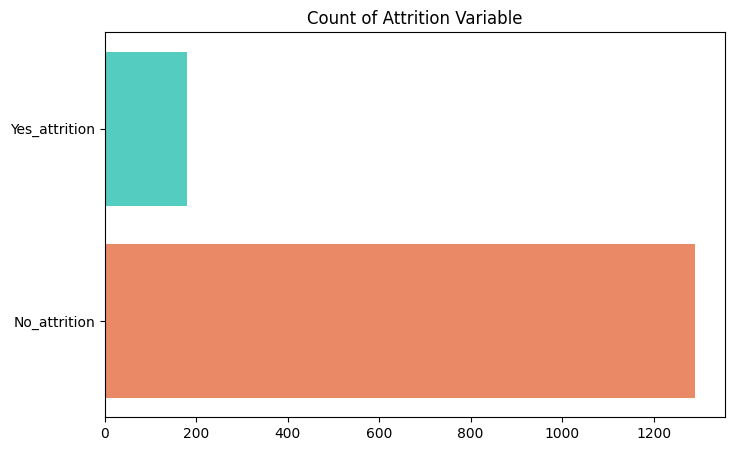

In [34]:
# Memisahkan data berdasarkan 'Attrition' (1 = keluar, 0 = tidak keluar)
attrition = data_karyawan[data_karyawan['Attrition'] == 1]
no_attrition = data_karyawan[data_karyawan['Attrition'] == 0]

# Menghitung jumlah masing-masing kategori
attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

# Menyusun kategori dan jumlah untuk plot
categories = ['Yes_attrition', 'No_attrition']
counts = [attrition_count, no_attrition_count]

# Membuat barplot dengan palet warna Turquoise dan Coral
plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=categories, hue=categories, palette=['#40E0D0','#FF7F50'], dodge=False)

# Memberikan judul pada plot
plt.title('Count of Attrition Variable')
plt.show()

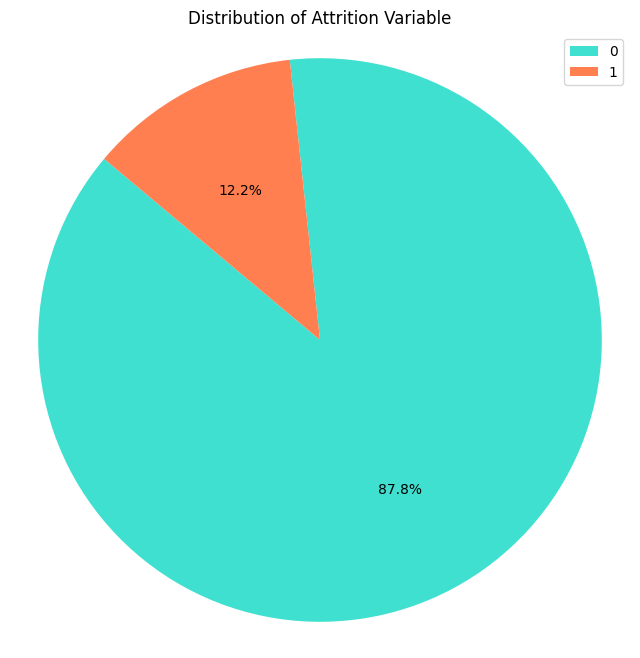

In [35]:
# Menghitung distribusi 'Attrition' pada data_karyawan
attrition_counts = data_karyawan['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values
colors = ['#40E0D0','#FF7F50']  #Turquoise dan Coral

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=0.7)
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.legend(labels, loc="best")

# Memberikan judul pada pie chart
plt.title('Distribution of Attrition Variable')
plt.show()

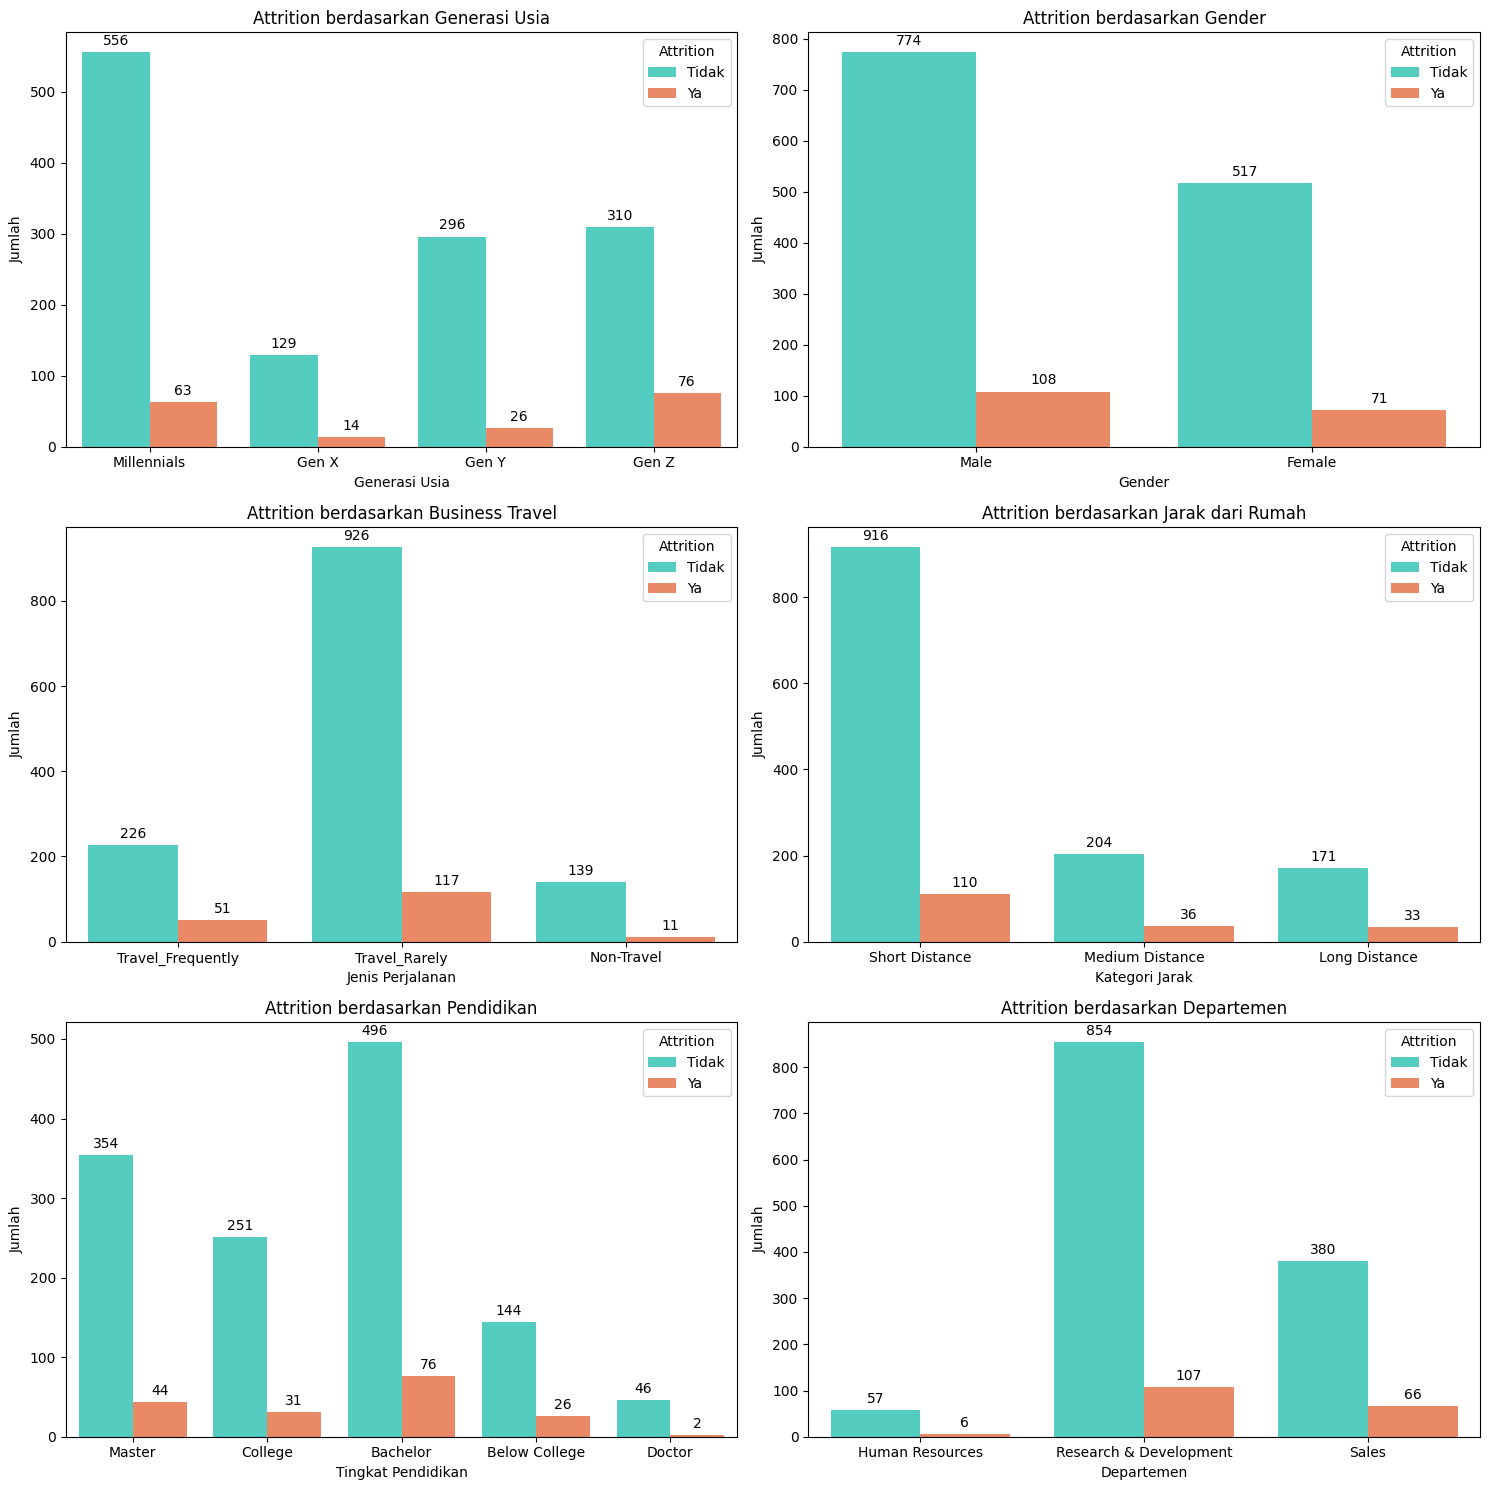

In [36]:
# Definisikan palet warna
colors = ['#40E0D0', '#FF7F50']  # Turquoise dan Coral

# Membuat 6 subplot (3 baris x 2 kolom)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Visualisasi: Attrition berdasarkan Generasi Usia
sns.countplot(x='AgeGeneration', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition berdasarkan Generasi Usia')
axes[0, 0].set_xlabel('Generasi Usia')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Visualisasi: Attrition berdasarkan Gender
sns.countplot(x='Gender', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition berdasarkan Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Jumlah')
axes[0, 1].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Visualisasi: Attrition berdasarkan Tingkat Pendidikan
sns.countplot(x='Education', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition berdasarkan Pendidikan')
axes[2, 0].set_xlabel('Tingkat Pendidikan')
axes[2, 0].set_ylabel('Jumlah')
axes[2, 0].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Visualisasi: Attrition berdasarkan Kategori Jarak dari Rumah
sns.countplot(x='DistanceFromHomeCategory', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition berdasarkan Jarak dari Rumah')
axes[1, 1].set_xlabel('Kategori Jarak')
axes[1, 1].set_ylabel('Jumlah')
axes[1, 1].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')


# Visualisasi: Attrition berdasarkan Departemen
sns.countplot(x='Department', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition berdasarkan Departemen')
axes[2, 1].set_xlabel('Departemen')
axes[2, 1].set_ylabel('Jumlah')
axes[2, 1].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Visualisasi: Attrition berdasarkan Perjalanan Bisnis
sns.countplot(x='BusinessTravel', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition berdasarkan Business Travel')
axes[1, 0].set_xlabel('Jenis Perjalanan')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].legend(title='Attrition', loc='upper right', labels=['Tidak', 'Ya'])
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Menyesuaikan tata letak agar tidak saling menindih
plt.tight_layout()
plt.show()


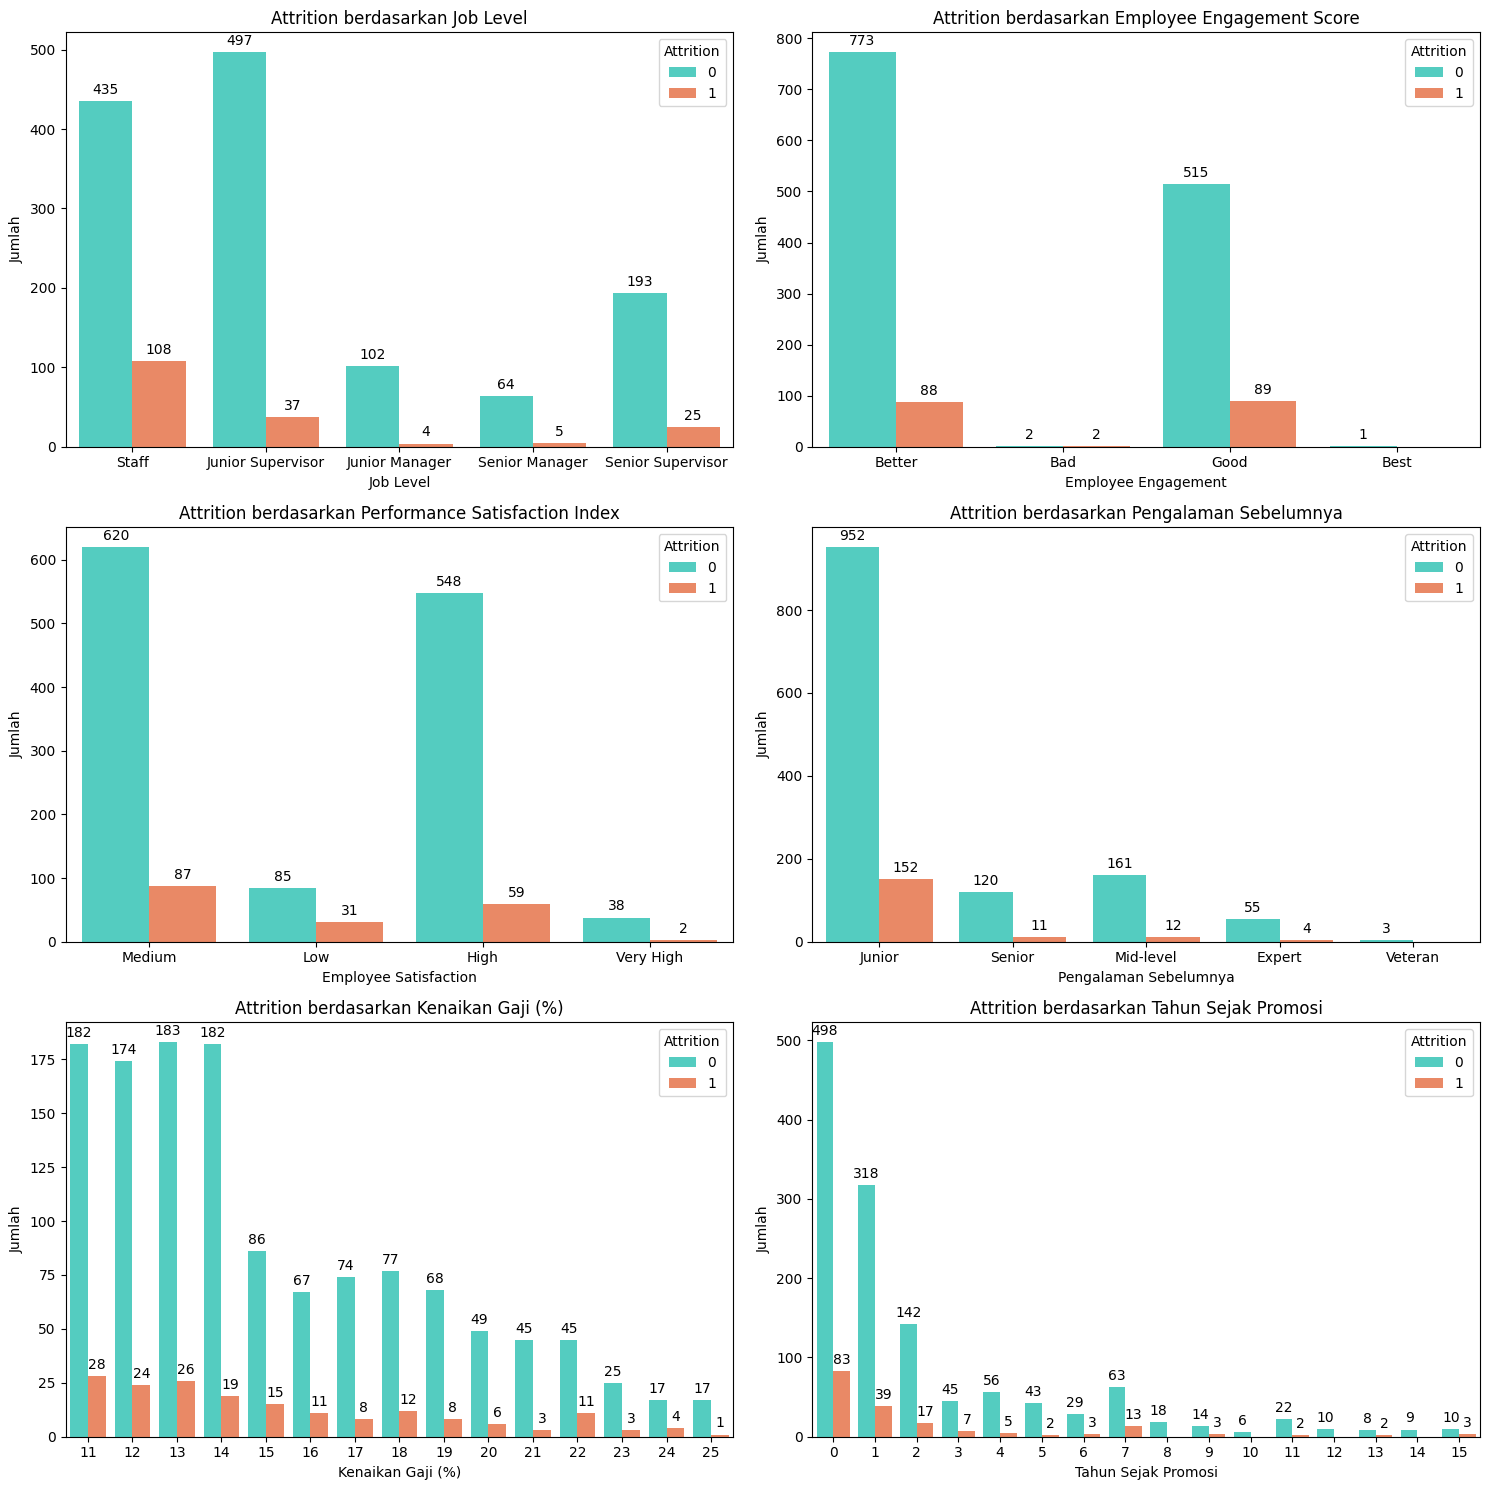

In [37]:
# Definisikan palet warna
colors = ['#40E0D0', '#FF7F50']  # Turquoise dan Coral

# Buat subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Attrition berdasarkan Job Level
sns.countplot(x='JobLevel', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition berdasarkan Job Level')
axes[0, 0].set_xlabel('Job Level')
axes[0, 0].set_ylabel('Jumlah')
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Attrition berdasarkan Pengalaman Sebelumnya
sns.countplot(x='ExperiencePriorToCurrentJob', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition berdasarkan Pengalaman Sebelumnya')
axes[1, 1].set_xlabel('Pengalaman Sebelumnya')
axes[1, 1].set_ylabel('Jumlah')
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Attrition berdasarkan Employee Engagement Score
sns.countplot(x='EmployeeEngagementScore', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition berdasarkan Employee Engagement Score')
axes[0, 1].set_xlabel('Employee Engagement')
axes[0, 1].set_ylabel('Jumlah')
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Attrition berdasarkan Performance Satisfaction Index
sns.countplot(x='PerformanceSatisfactionIndex', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition berdasarkan Performance Satisfaction Index')
axes[1, 0].set_xlabel('Employee Satisfaction')
axes[1, 0].set_ylabel('Jumlah')
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Attrition berdasarkan Kenaikan Gaji (%)
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition berdasarkan Kenaikan Gaji (%)')
axes[2, 0].set_xlabel('Kenaikan Gaji (%)')
axes[2, 0].set_ylabel('Jumlah')
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Attrition berdasarkan Tahun Sejak Promosi Terakhir
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition berdasarkan Tahun Sejak Promosi')
axes[2, 1].set_xlabel('Tahun Sejak Promosi')
axes[2, 1].set_ylabel('Jumlah')
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Tata letak
plt.tight_layout()
plt.show()


## Modeling

In [38]:
# Filter fitur kategorikal
category_cols = data_karyawan.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,AgeGeneration,BusinessTravel,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,ExperiencePriorToCurrentJob,Gender,JobLevel,JobRole,MaritalStatus,OverTime,PerformanceSatisfactionIndex
0,Millennials,Travel_Frequently,Human Resources,Short Distance,Master,Other,Better,Junior,Male,Staff,Human Resources,Married,Yes,Medium
1,Millennials,Travel_Rarely,Research & Development,Medium Distance,College,Medical,Bad,Senior,Female,Junior Supervisor,Healthcare Representative,Married,No,Low
2,Gen X,Travel_Rarely,Research & Development,Short Distance,Master,Life Sciences,Better,Mid-level,Male,Staff,Research Scientist,Married,Yes,Medium
3,Gen Y,Travel_Frequently,Sales,Long Distance,Bachelor,Marketing,Better,Junior,Female,Junior Manager,Sales Executive,Married,No,High
4,Millennials,Travel_Rarely,Research & Development,Short Distance,Master,Medical,Better,Senior,Female,Staff,Research Scientist,Married,No,Medium


In [39]:
# Menghitung jumlah nilai unik dari setiap kolom kategorikal
# Ini berguna untuk mengetahui berapa banyak kategori berbeda di setiap fitur
category_cols.nunique()

AgeGeneration                   4
BusinessTravel                  3
Department                      3
DistanceFromHomeCategory        3
Education                       5
EducationField                  6
EmployeeEngagementScore         4
ExperiencePriorToCurrentJob     5
Gender                          2
JobLevel                        5
JobRole                         9
MaritalStatus                   3
OverTime                        2
PerformanceSatisfactionIndex    4
dtype: int64

In [40]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal yang ingin dikodekan (diubah menjadi numerik)
columns_to_encode = [
    'Attrition', 'OverTime', 'AgeGeneration', 'BusinessTravel', 'Department',
    'DistanceFromHomeCategory', 'Education', 'EducationField',
    'EmployeeEngagementScore', 'MaritalStatus', 'ExperiencePriorToCurrentJob',
    'JobLevel', 'JobRole', 'Gender', 'PerformanceSatisfactionIndex'
]

# Melakukan label encoding pada setiap kolom kategorikal
for column in columns_to_encode:
    data_karyawan[column] = label_encoder.fit_transform(data_karyawan[column])

In [41]:
# Menghapus kolom yang berkaitan dengan pengalaman kerja terakhir dan hubungan dengan manajer
# Kolom yang dihapus:
# - 'YearsInCurrentRole'              : jumlah tahun dalam peran saat ini
# - 'YearsSinceLastPromotion'         : tahun sejak terakhir kali promosi
# - 'YearsWithCurrManager'            : tahun bekerja dengan manajer saat ini
emp_df = data_karyawan.drop(['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)

# Menampilkan 5 baris pertama dari DataFrame hasil
emp_df.head()

,AgeGeneration,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,EmployeeId,...,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceSatisfactionIndex,StockOptionLevel,TrainingTimesLastYear
0,3,0,1,1444,0,2,4,4,2,1,...,1,1,2991,5224,0,1,11,2,1,2
1,3,1,2,1141,1,1,2,3,0,2,...,0,1,4777,14382,5,0,15,1,0,2
2,0,1,2,1323,1,2,4,1,2,3,...,6,1,2461,10332,9,1,12,2,3,2
3,1,0,1,555,2,0,0,2,2,4,...,7,1,13525,14864,5,0,14,0,1,2
4,3,0,2,1194,1,2,4,3,2,5,...,6,1,2001,12549,2,0,14,2,3,2


In [42]:
# Memisahkan fitur (X) dan target (y) dari data_karyawan yang telah dibersihkan (emp_df)

# X berisi semua kolom kecuali 'Attrition', dan dikonversi menjadi array NumPy
X = np.array(emp_df.drop(['Attrition'], axis=1))

# y berisi kolom target 'Attrition' dalam bentuk array NumPy
y = np.array(emp_df['Attrition'])


In [43]:
# Membagi data menjadi data latih dan data uji
# - test_size=0.2 artinya 20% data digunakan untuk pengujian, 80% untuk pelatihan
# - random_state=42 memastikan pembagian data konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Menampilkan dimensi data latih dan data uji
print(X_train.shape)  # Jumlah baris dan kolom pada data latih
print(X_test.shape)   # Jumlah baris dan kolom pada data uji


(1176, 23)
(294, 23)


In [44]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi pada data latih
# - Menghitung mean dan standar deviasi dari X_train, lalu mentransformasikannya agar memiliki distribusi normal (mean=0, std=1)
X_train = scaler.fit_transform(X_train)

# Menggunakan parameter dari fit X_train untuk mentransformasi data uji (X_test)
X_test = scaler.transform(X_test)


### Model Logistic Regression

In [45]:
# Inisialisasi klasifikator Logistic Regression
clf_lr = LogisticRegression()

# Definisikan grid hyperparameter
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 150, 200, 300],
    'multi_class': ['auto'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_lr_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_lr_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari Logistic Regression adalah", test_accuracy)


d:\DS-Expert\hr_jjm\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Parameter terbaik: {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
Skor akurasi data uji dari Logistic Regression adalah 0.9013605442176871


### Model K Nearest Neighbors

In [46]:
# Inisialisasi KNeighborsClassifier
clf_knn = KNeighborsClassifier()

# Definisikan grid hyperparameter
param_grid1 = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_knn,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_knn_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_knn_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_knn_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari K-Nearest Neighbors Classifier adalah", test_accuracy)


Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Skor akurasi data uji dari K-Nearest Neighbors Classifier adalah 0.8945578231292517


### Model Naive Bayes

In [47]:
# Inisialisasi klasifikator Gaussian Naive Bayes
clf_nb = GaussianNB()

# Definisikan grid hyperparameter
param_grid1 = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.1, 0.9], [0.5, 0.5]]
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_nb,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_nb_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_nb_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_nb_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
print("Skor akurasi data uji dari Gaussian Naive Bayes Classifier adalah", accuracy_score(y_test, y_pred))


Parameter terbaik: {'priors': None, 'var_smoothing': 1e-09}
Skor akurasi data uji dari Gaussian Naive Bayes Classifier adalah 0.8775510204081632


### Model SVM Classifier

In [48]:
# Inisialisasi klasifikator SVM (Support Vector Machine)
clf_svm = SVC(probability=True)

# Definisikan grid hyperparameter
param_grid1 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_svm,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_svm_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_svm_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_svm_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari Support Vector Machine Classifier adalah", test_accuracy)


Parameter terbaik: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Skor akurasi data uji dari Support Vector Machine Classifier adalah 0.891156462585034


### Model Decision Tree

In [49]:
# Inisialisasi klasifikator Decision Tree
clf_dt = DecisionTreeClassifier()

# Definisikan grid hyperparameter
param_grid1 = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_dt_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_dt_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_dt_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari Decision Tree Classifier adalah", test_accuracy)


Parameter terbaik: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Skor akurasi data uji dari Decision Tree Classifier adalah 0.891156462585034


### Model Random Forest

In [50]:
# Inisialisasi klasifikator Random Forest
clf_rf = RandomForestClassifier()

# Definisikan grid hyperparameter
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_rf_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_rf_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_rf_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari Random Forest Classifier adalah", test_accuracy)


Parameter terbaik: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}
Skor akurasi data uji dari Random Forest Classifier adalah 0.8945578231292517


### Model MLP Classifier

In [51]:
# Inisialisasi klasifikator MLP (Multi-Layer Perceptron)
clf_mlp = MLPClassifier(max_iter=1500)

# Definisikan grid hyperparameter
param_grid1 = {
    'hidden_layer_sizes': [(1,), (10,), (20,), (30,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam', 'sgd']
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_mlp,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_mlp_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_mlp_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_mlp_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari MLP Classifier adalah", test_accuracy)


Parameter terbaik: {'activation': 'tanh', 'hidden_layer_sizes': (1,), 'solver': 'adam'}
Skor akurasi data uji dari MLP Classifier adalah 0.891156462585034


### Model Gradient Boosting

In [52]:
# Inisialisasi klasifikator Gradient Boosting
clf_gb = GradientBoostingClassifier()

# Definisikan grid hyperparameter
param_grid1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Inisialisasi GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_gb,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Latih klasifikator menggunakan GridSearchCV
clf_gb_grid = gs1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = clf_gb_grid.predict(X_test)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", clf_gb_grid.best_params_)

# Hitung dan cetak akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Skor akurasi data uji dari Gradient Boosting Classifier adalah", test_accuracy)


Parameter terbaik: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Skor akurasi data uji dari Gradient Boosting Classifier adalah 0.8809523809523809


## Evaluation

#### Logistic Regression

In [53]:
# Menghitung confusion matrix dari hasil prediksi dan label sebenarnya
conf_matrix_lr = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk model Logistic Regression
print("Confusion Matrix of Logistric Regression:")
print(conf_matrix_lr)

Confusion Matrix of Logistric Regression:
[[258   4]
 [ 31   1]]


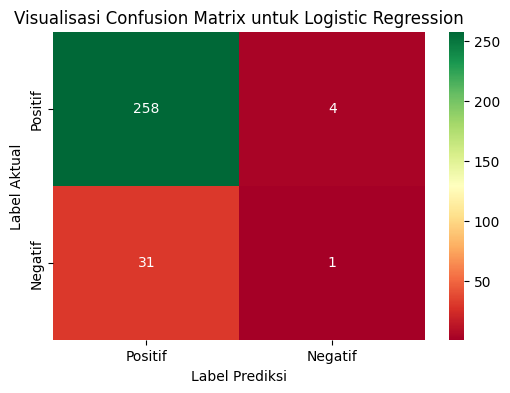

In [54]:
# Membuat canvas berukuran 6x4 inci untuk visualisasi
plt.figure(figsize=(6, 4))

# Menampilkan heatmap dari confusion matrix dengan anotasi dan palet warna RdYlGn
sns.heatmap(conf_matrix_lr, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positif', 'Negatif'],
            yticklabels=['Positif', 'Negatif'])

# Menambahkan label untuk sumbu X dan Y
plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')

# Menambahkan judul pada visualisasi
plt.title('Visualisasi Confusion Matrix untuk Logistic Regression')

# Menampilkan plot ke layar
plt.show()


In [55]:
# Menampilkan laporan klasifikasi untuk model Logistic Regression
print("Laporan Klasifikasi untuk Logistic Regression:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi untuk Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### K-Nearest Neighbors (KNN)

In [56]:
# Menghitung confusion matrix dari hasil prediksi dan label sebenarnya untuk KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk model K-Nearest Neighbors
print("Confusion Matrix of K-Nearest Neighbors:")
print(conf_matrix_knn)

Confusion Matrix of K-Nearest Neighbors:
[[258   4]
 [ 31   1]]


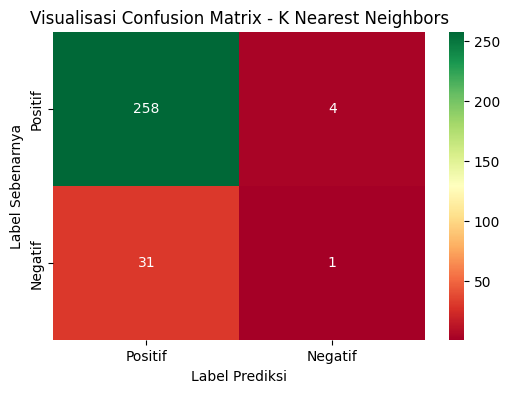

In [57]:
# Menyiapkan area gambar berukuran 6x4 inci
plt.figure(figsize=(6, 4))

# Menampilkan heatmap dari matriks kebingungan KNN dengan anotasi dan palet warna 'RdYlGn'
sns.heatmap(conf_matrix_knn, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positif', 'Negatif'],
            yticklabels=['Positif', 'Negatif'])

# Memberikan label pada sumbu X dan Y
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')

# Menambahkan judul pada visualisasi heatmap
plt.title('Visualisasi Confusion Matrix - K Nearest Neighbors')

# Menampilkan hasil plot ke layar
plt.show()

In [58]:
# Menampilkan laporan performa klasifikasi untuk model K-Nearest Neighbors
print("Laporan Klasifikasi dari Model K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi dari Model K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### Naive Bayes

In [59]:
# Menghitung confusion matrix dari hasil prediksi dan label sebenarnya untuk Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk model Naive Bayes
print("Confusion Matrix of Naive Bayes:")
print(conf_matrix_nb)

Confusion Matrix of Naive Bayes:
[[258   4]
 [ 31   1]]


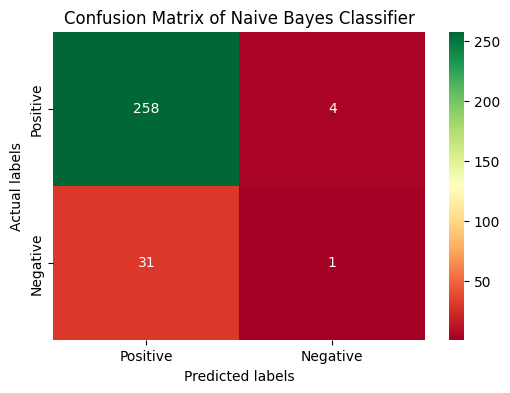

In [60]:
# Menentukan ukuran figure untuk visualisasi
plt.figure(figsize=(6, 4))

# Membuat heatmap dari confusion matrix Naive Bayes dengan anotasi nilai dan pengaturan warna
sns.heatmap(conf_matrix_nb, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],  # Label untuk sumbu X
            yticklabels=['Positive', 'Negative'])  # Label untuk sumbu Y

# Menambahkan label untuk sumbu X dan Y
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# Menambahkan judul pada plot
plt.title('Confusion Matrix of Naive Bayes Classifier')

# Menampilkan heatmap
plt.show()

In [61]:
# Menampilkan informasi bahwa hasil classification report untuk model Naive Bayes akan ditampilkan
print("The Classification Report of Naive Bayes Classifier")

# Menampilkan classification report yang berisi precision, recall, f1-score, dan support
print(classification_report(y_test, y_pred))

The Classification Report of Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### SVM Classifier

In [62]:
# Menghitung confusion matrix dari hasil prediksi dan label sebenarnya untuk Support Vector Machine
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk model Support Vector Machine
print("Confusion Matrix of Support Vector Machine:")
print(conf_matrix_svm)


Confusion Matrix of Support Vector Machine:
[[258   4]
 [ 31   1]]


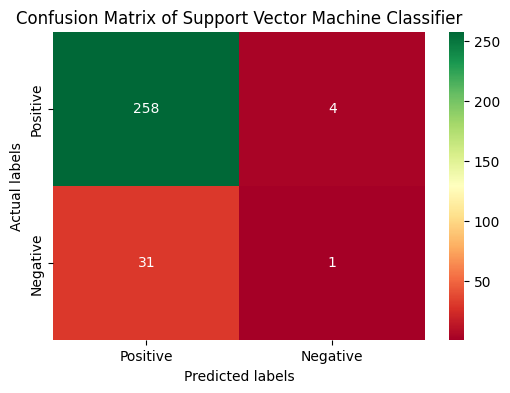

In [63]:
# Menentukan ukuran figure untuk visualisasi
plt.figure(figsize=(6, 4))

# Membuat heatmap dari confusion matrix SVM dengan anotasi nilai dan pengaturan warna
sns.heatmap(conf_matrix_svm, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],  # Label untuk sumbu X
            yticklabels=['Positive', 'Negative'])  # Label untuk sumbu Y

# Menambahkan label untuk sumbu X dan Y
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# Menambahkan judul pada plot
plt.title('Confusion Matrix of Support Vector Machine Classifier')

# Menampilkan heatmap
plt.show()


In [64]:
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### Random Forest

In [65]:
# Menghitung confusion matrix dari hasil prediksi dan label sebenarnya untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk model Random Forest
print("Confusion Matrix of Random Forest:")
print(conf_matrix_rf)

Confusion Matrix of Random Forest:
[[258   4]
 [ 31   1]]


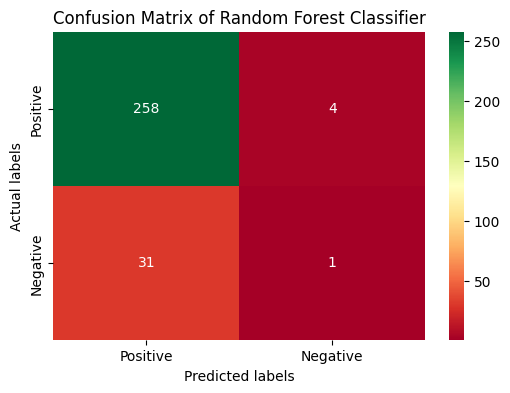

In [66]:
# Menentukan ukuran figure untuk visualisasi confusion matrix
plt.figure(figsize=(6, 4))

# Membuat heatmap dari confusion matrix Random Forest dengan anotasi nilai
# cmap diubah ke 'YlGnBu' untuk skema warna biru-ke-hijau
sns.heatmap(conf_matrix_rf, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],  # Label sumbu X
            yticklabels=['Positive', 'Negative'])  # Label sumbu Y

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Predicted labels')   # Label prediksi dari model
plt.ylabel('Actual labels')      # Label sebenarnya dari data

# Menambahkan judul pada heatmap
plt.title('Confusion Matrix of Random Forest Classifier')

# Menampilkan heatmap ke layar
plt.show()


In [67]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### Decision Tree

In [68]:
# Menghitung confusion matrix berdasarkan hasil prediksi dan label aktual untuk model Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix untuk klasifikasi menggunakan Decision Tree
print("Confusion Matrix of Decision Tree Classifier:")
print(conf_matrix_dt)

Confusion Matrix of Decision Tree Classifier:
[[258   4]
 [ 31   1]]


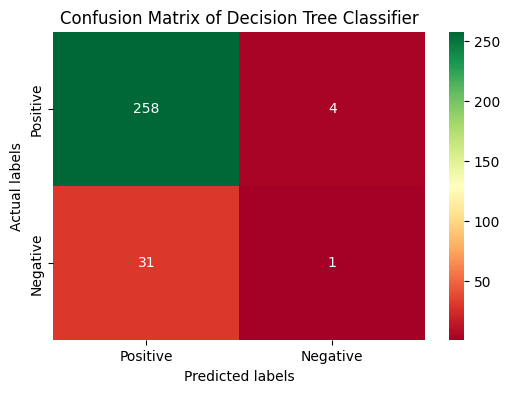

In [69]:
# Menentukan ukuran figure untuk visualisasi heatmap
plt.figure(figsize=(6, 4))

# Membuat heatmap dari confusion matrix Decision Tree
# - annot=True: menampilkan nilai di setiap sel
# - cmap='Spectral': skema warna gradasi untuk membedakan intensitas
# - fmt='g': menampilkan angka dalam format bilangan bulat
# - xticklabels dan yticklabels memberi label pada sumbu X dan Y
sns.heatmap(conf_matrix_dt, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])

# Menambahkan label pada sumbu X (hasil prediksi) dan Y (label aktual)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# Menambahkan judul pada plot heatmap
plt.title('Confusion Matrix of Decision Tree Classifier')

# Menampilkan heatmap di layar
plt.show()


In [70]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### MLP Classifier

In [71]:
conf_matrix_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of MLP Classifier:")
print(conf_matrix_mlp)

Confusion Matrix of MLP Classifier:
[[258   4]
 [ 31   1]]


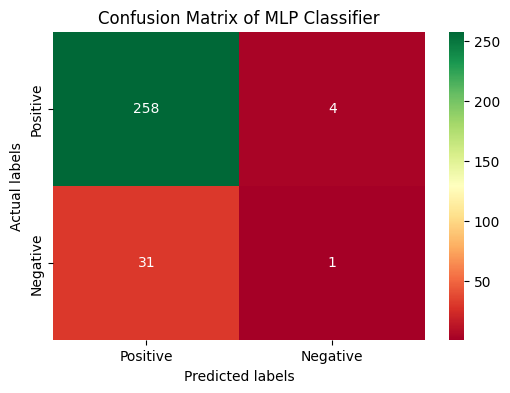

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of MLP Classifier')
plt.show()

In [73]:
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



#### Gradient Boosting

In [74]:
conf_matrix_gb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Gradient Boosting Classifier:")
print(conf_matrix_gb)

Confusion Matrix of Gradient Boosting Classifier:
[[258   4]
 [ 31   1]]


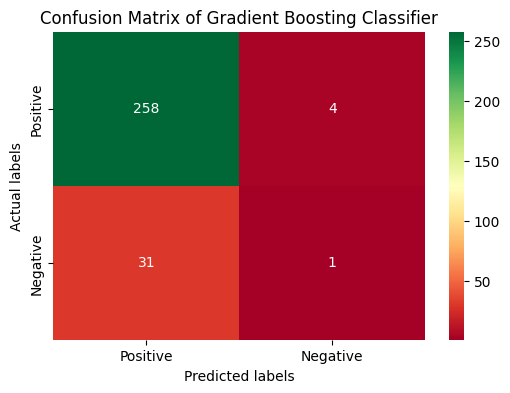

In [75]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, cmap='RdYlGn', fmt='g',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

In [76]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       262
           1       0.20      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294



## Deployment



In [77]:
# Save the model with joblib
joblib.dump(clf_lr_grid, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']